In [1]:
import pandas as pd
dataset = pd.read_csv('Preplacement.csv')
dataset

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,0.0
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,214,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


Mean: 67.30339534883721 Std Dev: 10.827205398231452
The area between range(50,70):0.5304184324400784


C:\Anaconda3\envs\aiml\lib\site-packages\ipykernel_launcher.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  after removing the cwd from sys.path.


0.5304184324400784

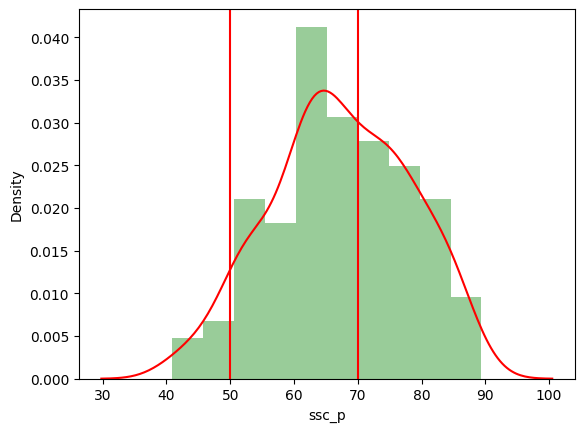

In [2]:
def get_pdf_probability(dataset,startrange,endrange): # creating a function with dataset,start and end range of the data.
    from matplotlib import pyplot as py # importing lib
    import seaborn as sns
    graph = sns.distplot(dataset,kde = True,kde_kws={'color':'red'},color='green')
    # kde(Kernal density function) - for curve, kde_kws - for color of that curve, colour green is for that histo colour.
    py.axvline(startrange, color= 'Red') # to draw a line in a vertical form
    py.axvline(endrange , color = 'Red') # to draw a line in a vertical form
    
    #generate a sample mean and std
    sample = dataset
    # to find a mean and std dev
    sample_mean = sample.mean()
    sample_std = sample.std()
#     print('Mean=%.3f, Standard Deviation=%.3f' % (sample_mean, sample_std))
    print("Mean:",sample_mean, "Std Dev:",sample_std)
    #to define normal dist
    from scipy.stats import norm # norm is an inbuilt func need to import library
    dist = norm(sample_mean, sample_std) # to find the normal distribution 
    
    # sample probability for a range of outcomes
    values = [value for value in range(startrange, endrange)] # single line for loop to store it in list directly
    # values will store the value. the values from 50 to 69 will be stored in values  
#     print(values)
    probabilities = [dist.pdf(value) for value in values] # using dist.pdf can able to fin the probablity density function of values
    prob = sum(probabilities) # here to find the total probability
    print("The area between range({},{}):{}".format(startrange,endrange,sum(probabilities)))
    return prob
    
get_pdf_probability(dataset['ssc_p'],50,70) # here the column name is ssc_p and start range is 50, end range is 70 
# so the conclusion is nearly 53% of students scored 50 to 70 marks.

# Converting normal dist to std normal dist

In [33]:
def std_normal_dist(dataset): # to create a func 
    import seaborn as sns # import lib
    mean = dataset.mean() # to find mean
    std_dev = dataset.std() # to find std dev
    
    values = [i for i in dataset] # values will store the dataset value and that values will be in list
    
    z_score = [((j-mean)/std_dev) for j in values] # z score formula = x-mean/std dev, x is input, here j is input, j will take value from dataset 
    
    sns.distplot(z_score,kde = True, kde_kws ={'color':'Red'}) # dist graph with red curve
    
#     a = sum(z_score)/len(z_score)
#     print(a)

C:\Anaconda3\envs\aiml\lib\site-packages\ipykernel_launcher.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  # Remove the CWD from sys.path while we load stuff.


AttributeError: 'list' object has no attribute 'mean'

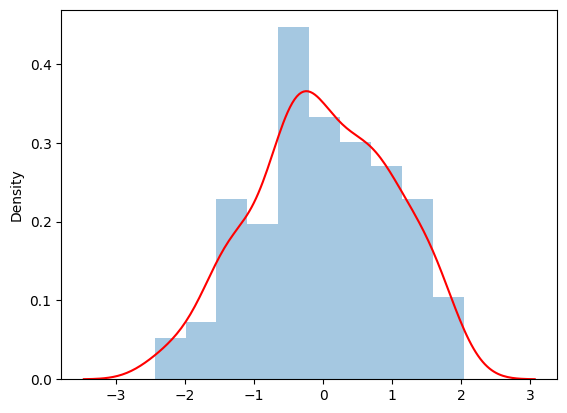

In [34]:
std_normal_dist(dataset['ssc_p'])